# **Trabalho Final PDM - Análise de Sentimentos**
#### **Disciplina: Computação Paralela**
#### **Professor: Sávio**

#### **Alunos:**
**- Gustavo Rodrigues Ribeiro / RA:202003570** \
**- Khalil Alves / RA: 202103745** \
**- Keven Lucas / RA: 202000181** \
**- Matheus Leonel / RA:  202109822** \
**- Salvador Ludovico / RA: 202204038**


# **Domínio do Negócio: E-commerce**
### Para este projeto, o domínio de negócio escolhido será o de e-commerce com foco na análise de sentimentos em avaliações de produtos. As avaliações são obtidas de um dataset público de avaliações de produtos eletrônicos, como o Amazon Product Reviews Dataset, que oferece avaliações reais em várias categorias de produtos.

## Iniciando o PySpark

**OBS: Necessário caso utilize Google Coolab ou outra plataforma para criação de códigos em Jupyter Notebook, no entanto, se utilizar o JupyterLab em um Dataproc no Google Cloud Console, essa etapa pode desconsiderada.**

Esta célula de código instala o Spark no ambiente de execução Colab. Aqui está uma explicação passo a passo:

1. **`!apt-get install openjdk-11-jdk-headless -qq > /dev/null`**: este comando instala o OpenJDK 11 (versão headless, sem interface gráfica), que é um requisito para o Spark. O `-qq` suprime a saída e o `> /dev/null` redireciona a saída para o nada, tornando o processo mais silencioso.

2. **`!wget -q https://dlcdn.apache.org/spark/spark-3.5.2/spark-3.5.3-bin-hadoop3.tgz`**: Este comando baixa o arquivo compactado do Spark 3.5.2 (construído para o Hadoop 3) do site oficial do Apache Spark. O `-q` suprime a saída de download.

3. **`!tar xf spark-3.5.3-bin-hadoop3.tgz`**: Este comando extrai o arquivo compactado baixado do Spark, criando um diretório chamado `spark-3.5.3-bin-hadoop3`.

4. **`!pip -q install findspark`**: Este comando instala a biblioteca `findspark` usando `pip`. Findspark é uma biblioteca Python que torna mais fácil configurar o Spark em um ambiente Python, principalmente no Colab. Ela define as variáveis de ambiente necessárias para que o Spark funcione corretamente.

Após executar essas linhas, você terá o Spark instalado e pronto para ser usado em seu notebook Colab.

## Conexão Via Unix/Colab/GCP

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz
!tar xf spark-3.5.6-bin-hadoop3.tgz
!pip -q install findspark

Defina as variáveis de ambiente do Spark:

In [12]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.6-bin-hadoop3"

O código a seguir garante que o Spark seja configurado corretamente e esteja pronto para uso em seu ambiente Python.

* **`findspark.init()`**: executa a função `init()` do módulo `findspark`. Esta função:
    * Localiza a instalação do Spark em seu sistema.
    * Configura as variáveis de ambiente necessárias para que o Python possa interagir com o Spark. Isso permite que o driver Python (seu código Python) se comunique com o executor Spark (o código que realmente processa os dados).


In [13]:
import findspark
findspark.init()

Depois de executar a célula anterior, você poderá importar e usar as bibliotecas Spark como `pyspark.sql.SparkSession` para criar uma sessão Spark e começar a trabalhar com dados.

## Conexão Via Windows

In [1]:
import os
import requests
import tarfile
import sys

# --- 1. Baixar o Spark (substitui o wget) ---
spark_version = "3.5.6"  # Usando uma versão estável e popular
hadoop_version = "3"
spark_url = f"https://dlcdn.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz"
spark_filename = os.path.basename(spark_url)
spark_foldername = spark_filename.replace(".tgz", "")

print(f"Baixando {spark_filename}...")
# Faz o download apenas se o arquivo não existir
if not os.path.exists(spark_filename):
    response = requests.get(spark_url, stream=True)
    if response.status_code == 200:
        with open(spark_filename, "wb") as f:
            f.write(response.raw.read())
        print("Download completo.")
    else:
        print(f"Erro ao baixar o arquivo. Status: {response.status_code}")
else:
    print("Arquivo Spark já existe, pulando download.")

# --- 2. Extrair o Spark (substitui o tar) ---
print(f"Extraindo {spark_filename}...")
# Extrai apenas se a pasta de destino não existir
if not os.path.exists(spark_foldername):
    with tarfile.open(spark_filename, "r:gz") as tar:
        tar.extractall()
    print("Extração completa.")
else:
    print("Pasta do Spark já existe, pulando extração.")

!pip -q install findspark

print("\nConfiguração inicial concluída!")

Baixando spark-3.5.6-bin-hadoop3.tgz...
Arquivo Spark já existe, pulando download.
Extraindo spark-3.5.6-bin-hadoop3.tgz...
Pasta do Spark já existe, pulando extração.

Configuração inicial concluída!



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import findspark

# --- Configurar as Variáveis de Ambiente para o Python ---

# Caminho para a pasta do Spark que foi extraída
# Use os.path.abspath para garantir um caminho absoluto e compatível com Windows
spark_home = os.path.abspath("spark-3.5.6-bin-hadoop3")

# ATENÇÃO: Verifique se este caminho do JAVA_HOME está correto para a sua máquina!
# Deve ser o mesmo que você configurou nas variáveis de ambiente do Windows.
java_home = r"C:\Program Files\Java\zulu21.34.19-ca-jdk21.0.3-win_x64"
hadoop_home = r"C:\hadoop-3.3.6"

print(f"SPARK_HOME: {spark_home}")
print(f"JAVA_HOME: {java_home}")
print(f"HADOOP_HOME: {hadoop_home}")

# Define as variáveis de ambiente para a sessão atual
os.environ["SPARK_HOME"] = spark_home
os.environ["JAVA_HOME"] = java_home
os.environ["HADOOP_HOME"] = hadoop_home

# Adiciona os binários do Spark e Hadoop ao PATH do sistema
os.environ["PATH"] = f"{os.environ['SPARK_HOME']}\\bin;{os.environ['HADOOP_HOME']}\\bin;{os.environ['PATH']}"

# --- Inicializar o findspark ---
findspark.init()

SPARK_HOME: c:\Users\gusta\Desktop\TrabalhoFinalCP\spark-3.5.6-bin-hadoop3
JAVA_HOME: C:\Program Files\Java\zulu21.34.19-ca-jdk21.0.3-win_x64
HADOOP_HOME: C:\hadoop-3.3.6


**OBS: Vale lembra que esse é um código para a criação de um modelo de treinamento e teste de IA para análise de sentimento através de um dataset de avaliações de produtos, com cerca de 6000000 de reviews. Logo, é importante entender que, algumas vezes, apenas o Colab (versão gratuita) não possui recursos computacionais (GPU e RAM) suficientes para executar o modelo por completo. Assim, recomendamos a utilização da máquina local com cerca de 64gb de RAM ou uma máquina virtual como a n2-highmem-8 no Dataproc do Google Cloud Console, com o ambiente virtual Jupyter Notebook. Assim, o código irá executar sem erros de memória ou GPU.**

**OBS 2: Caso utilize uma máquina virtual no Dataproc do Google Cloud Console, com o ambiente virtual Jupyter Notebook, não serão necessários os passos acima, apenas continue daqui.**

**OBS 3: No caso da Camada Bronze, o código atual, ele pode ser executado no Google Colab sem problemas, assim irá funcionar corretamente.**

## Conectando ao Drive

Aqui estaremos sincronizando nossa conta no Drive ao ambiente Colab, para que os arquivos em nuvem sejam gerenciados (lidos e escritos) e manipulados diretamente no Drive.

**OBS: Caso esteja utilizando o Dataproc do Google Cloud Console, com o ambiente virtual Jupyter Notebook, você podera utilizar o Data Lake Google Cloud Storage (GCS) que está conectado a sua conta, não necessitando desse processo de sincronização com o Drive.**

In [16]:
from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google'

In [ ]:
!ls /content/drive

MyDrive  Shareddrives


## Importações e Função Para Criação da Sessão Spark

In [2]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import concat_ws, length, size, split
import os

Função para criação da sessão

In [3]:
def get_spark_session(cores):
    """Cria uma sessão Spark em modo local com um número definido de cores."""
    return SparkSession.builder \
        .appName(f"SilverLayerAnalysis_Cores_{cores}") \
        .master(f"local[{cores}]") \
        .config("spark.driver.memory", "32g") \
        .getOrCreate()

## **Arquitetura Medallion: SILVER - Processamento e Limpeza dos Dados**

Função da Tarefa a ser Medida (Processamento da Camada Silver)

In [4]:
def run_silver_layer_task(spark, input_path):
    """
    Executa a limpeza e o enriquecimento da Camada Silver, com etapas adicionais
    de remoção de duplicatas e stopwords para uma análise mais robusta.
    """
    print(f"Lendo dados Parquet da Camada Bronze de: {input_path}")
    reviews_df_silver = spark.read.parquet(input_path)

    # ---- Remoção de Duplicatas ----

    print("Iniciando remoção de duplicatas (operação com shuffle)...")
    initial_count = reviews_df_silver.count()
    reviews_df_silver = reviews_df_silver.dropDuplicates(["reviewerID", "reviewText"])
    final_count = reviews_df_silver.count()
    print(f"Removidas {initial_count - final_count} linhas duplicadas.")

    # --------------------------------------------------------------------

    #### -------------------------------------- Limpeza de Dados ---------------------------------------- ####

    print("Iniciando transformações da Camada Silver...")

    # 1. Filtra para remover as linhas onde style não é NULL
    reviews_df_silver = reviews_df_silver.filter(col("style")["Format:"].isNull())

    # 2. Tratar valores ausentes (Exemplo: Preencher 'vote' com 0 se estiver ausente)
    reviews_df_silver = reviews_df_silver.fillna({'vote': 0, 'reviewText': "Missing Field", 'summary': "Missing Field"})

    # 3. Remover espaços extras e vírgula para transformar '01 1, 2008' em '01-01-2008' ou '11 21, 2013' em '11-21-2013'
    reviews_df_silver = reviews_df_silver.withColumn("reviewTime", regexp_replace("reviewTime", r"(\d{2}) (\d), (\d{4})", "$1-0$2-$3"))
    reviews_df_silver = reviews_df_silver.withColumn("reviewTime", regexp_replace("reviewTime", r"(\d{2}) (\d{2}), (\d{4})", "$1-$2-$3"))

    # 4. Convertendo review_date para formato de data padrão (DateType)
    reviews_df_silver = reviews_df_silver.withColumn("reviewTime", to_date("reviewTime", "MM-dd-yyyy"))

    # 5. Filtrando as reviews de 2013 a 2018
    reviews_df_silver = reviews_df_silver.filter("reviewTime >= '2013-01-01' and reviewTime <= '2018-12-31'")

    # 6. Selecionar apenas as colunas que são importantes para a análise
    columns_to_keep_intermediate = ["overall", "reviewTime", "reviewerID", "asin", "reviewText"]
    reviews_df_silver = reviews_df_silver.select(*columns_to_keep_intermediate)

    # 7. Remover linhas com valores nulos nas colunas importantes
    reviews_df_silver = reviews_df_silver.na.drop(subset=["overall", "reviewText"])

    # 8. Removendo caracteres especiais de cada valor da coluna 'reviewText'.
    reviews_df_silver = reviews_df_silver.withColumn("reviewText", regexp_replace("reviewText", "[^a-zA-Z0-9\\s]", ""))

    # 9. Remove os espaços em branco que estiverem no início e no fim de cada valor da coluna 'reviewText'.
    reviews_df_silver = reviews_df_silver.withColumn("reviewText", trim(col("reviewText")))

    # 10. Converte todo o texto da coluna 'reviewText' para letras minúsculas.
    reviews_df_silver = reviews_df_silver.withColumn("reviewText", lower(col("reviewText")))

    # ---- Remoção de Stopwords e tokenização ----

    print("Tokenizando texto e removendo stopwords...")

    # 11. Tokenizando o texto
    tokenizer = Tokenizer(inputCol="reviewText", outputCol="reviewTokens")
    reviews_df_tokenized = tokenizer.transform(reviews_df_silver)

    # 12. Removendo Stopwords
    remover = StopWordsRemover(inputCol="reviewTokens", outputCol="filteredTokens")
    reviews_df_no_stopwords = remover.transform(reviews_df_tokenized)

    # 13. Criação da coluna com o texto limpo
    reviews_df_silver = reviews_df_no_stopwords.withColumn("reviewTextClean", concat_ws(" ", "filteredTokens")) \
                                               .drop("reviewTokens", "filteredTokens")

    # ----------------------------------------------------------------------------------

    #### -------------------------------------- Enriquecimento ---------------------------------------- ####

    # ---- Engenharia de Features Simples ----

    print("Criando novas features (comprimento e contagem de palavras)...")

    # 14. Criação de festures com o comprimento e contagem de palavras
    reviews_df_silver = reviews_df_silver.withColumn("review_length", length(col("reviewTextClean")))
    reviews_df_silver = reviews_df_silver.withColumn("word_count", size(split(col("reviewTextClean"), " ")))

    # -----------------------------------------------------------

    print("Enriquecendo dados com ano, mês e sentimento...")

    # 15. Extração de ano e mês da data de 'review'
    reviews_df_silver = reviews_df_silver.withColumn("year", year(col("reviewTime")))
    reviews_df_silver = reviews_df_silver.withColumn("month", month(col("reviewTime")))

    # 16. Criar uma coluna de sentimento baseada em 'overall'
    reviews_df_silver = reviews_df_silver.withColumn("sentiment_by_rating",
                                                  when(col("overall") >= 4, "positive")
                                                  .when(col("overall") == 3, "neutral")
                                                  .otherwise("negative"))

    # 17. Criar coluna de sentimento com valores inteiros para análise (2 para positivo, 1 para neutro e 0 para negativo)
    reviews_df_silver = reviews_df_silver.withColumn("sentimentOverall",
                                                  when(col("overall") >= 4, 2)
                                                  .when(col("overall") == 3, 1)
                                                  .otherwise(0))
    print("Tarefa da Camada Silver concluída.")

    return reviews_df_silver

Definindo Caminhos

In [5]:
# Defina os caminhos para seus dados
silver_input_path = r"C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Bronze\reviews_bronze"
silver_output_path = r"C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Silver\reviews_silver"

## Avaliações

In [6]:
# Lista de número de cores para testar. O '1' representa o modo sequencial.
core_counts = [1, 2, 4, 6]  # Ajuste para os núcleos da sua máquina
results = []

print("Iniciando experimento de desempenho da Camada Silver...")
print(f"Dataset de entrada: {silver_input_path}")

for cores in core_counts:
    print(f"\n---------- EXECUTANDO COM {cores} CORE(S) ----------")

    # Inicia uma sessão Spark nova e limpa para cada teste
    spark = get_spark_session(cores)

    start_time = time.time()

    # Executa a tarefa da camada Silver
    reviews_df_silver_current_run = run_silver_layer_task(spark, silver_input_path)

    end_time = time.time()
    execution_time = end_time - start_time

    # Armazena os resultados
    results.append({
        "num_cores": cores,
        "execution_time": execution_time
    })

    print(f"Tempo de execução: {execution_time:.2f} segundos")

    # Se esta for a última iteração (ou a que você quer salvar), mantenha a referência ao DataFrame antes de parar a sessão.
    if cores == core_counts[-1]:
        reviews_df_silver = reviews_df_silver_current_run
    else:
        # Para a sessão para liberar recursos para iterações futuras
        spark.stop()

if reviews_df_silver is not None:
    print(f"\nEscrevendo dados da Camada Silver para: {silver_output_path}")
    # Salva o DataFrame como tabela da camada Silver (formato .parquet)
    reviews_df_silver.write.mode("overwrite").option("header", True).parquet(silver_output_path)
    spark.stop()
else:
    print("Nenhum dataframe para salvar após o loop.")

Iniciando experimento de desempenho da Camada Silver...
Dataset de entrada: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Bronze\reviews_bronze

---------- EXECUTANDO COM 1 CORE(S) ----------
Lendo dados Parquet da Camada Bronze de: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Bronze\reviews_bronze
Iniciando remoção de duplicatas (operação com shuffle)...
Removidas 704822 linhas duplicadas.
Iniciando transformações da Camada Silver...
Tokenizando texto e removendo stopwords...
Criando novas features (comprimento e contagem de palavras)...
Enriquecendo dados com ano, mês e sentimento...
Tarefa da Camada Silver concluída.
Tempo de execução: 57.27 segundos

---------- EXECUTANDO COM 2 CORE(S) ----------
Lendo dados Parquet da Camada Bronze de: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Bronze\reviews_bronze
Iniciando remoção de duplicatas (operação com shuffle)...
Removidas 704822 linhas duplicadas.
Iniciando transformações da Camada Silver...
Tokenizando texto e removendo stopwords...
Cria

## Análise e Visualização dos Resultados



#### Análise Final de Desempenho da Camada Silver ####


--- Tabela de Resultados ---

                 cores  execution_time  speedup  efficiency
0  Sequencial (1 Core)           57.27     1.00        1.00
1   Paralelo (2 Cores)           28.93     1.98        0.99
2   Paralelo (4 Cores)           11.51     4.98        1.24
3   Paralelo (6 Cores)            9.37     6.11        1.02


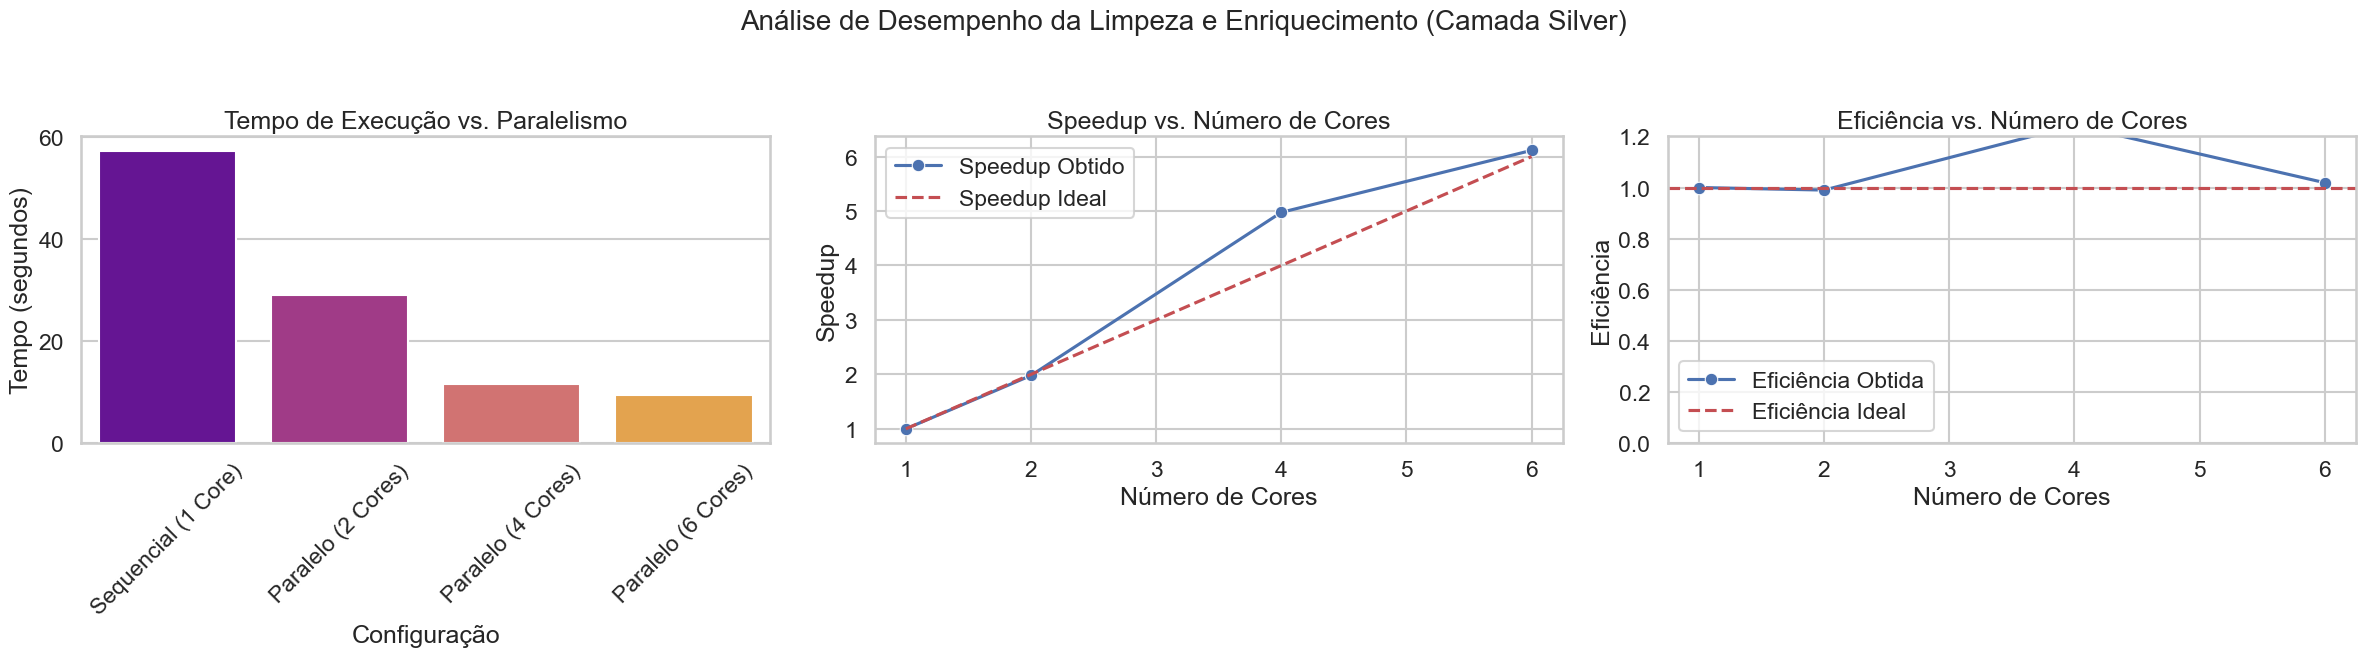

In [7]:
print("\n\n#### Análise Final de Desempenho da Camada Silver ####\n\n")

results_df = pd.DataFrame(results)
results_df['cores'] = results_df['num_cores'].apply(lambda x: 'Sequencial (1 Core)' if x == 1 else f'Paralelo ({x} Cores)')

sequential_time = results_df.loc[results_df['num_cores'] == 1, 'execution_time'].iloc[0]
results_df['speedup'] = sequential_time / results_df['execution_time']
results_df['efficiency'] = results_df['speedup'] / results_df['num_cores']

print("--- Tabela de Resultados ---\n")
print(results_df[['cores', 'execution_time', 'speedup', 'efficiency']].round(2))

sns.set_theme(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, 3, figsize=(24, 7))
fig.suptitle('Análise de Desempenho da Limpeza e Enriquecimento (Camada Silver)', fontsize=20)

sns.barplot(ax=axes[0], x='cores', y='execution_time', data=results_df, palette='plasma', hue='cores', legend=False)
axes[0].set_title('Tempo de Execução vs. Paralelismo')
axes[0].set_xlabel('Configuração')
axes[0].set_ylabel('Tempo (segundos)')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1], x='num_cores', y='speedup', data=results_df, marker='o', label='Speedup Obtido')
axes[1].plot(results_df['num_cores'], results_df['num_cores'], linestyle='--', color='r', label='Speedup Ideal')
axes[1].set_title('Speedup vs. Número de Cores')
axes[1].set_xlabel('Número de Cores')
axes[1].set_ylabel('Speedup')
axes[1].legend()

sns.lineplot(ax=axes[2], x='num_cores', y='efficiency', data=results_df, marker='o', label='Eficiência Obtida')
axes[2].axhline(y=1.0, linestyle='--', color='r', label='Eficiência Ideal')
axes[2].set_title('Eficiência vs. Número de Cores')
axes[2].set_xlabel('Número de Cores')
axes[2].set_ylabel('Eficiência')
axes[2].set_ylim(0, 1.2)
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Análise

A camada Silver apresentou excelente escalabilidade, com ganho de desempenho significativo até 4 núcleos e redução do tempo de execução em mais de 75%. Isso se deve à predominância de transformações em memória (como limpeza textual, remoção de duplicatas e criação de features), que são mais sensíveis ao aumento do paralelismo do que as tarefas de leitura/gravação.

A operação ‘dropDuplicates’, que envolve shuffle (redistribuição de dados entre partições), e a escrita final dos dados introduzem overheads que afetam a escalabilidade perfeita. Ainda assim, o ganho foi expressivo até 4 núcleos.

A eficiência maior que 1 observada em 4 e 6 núcleos indica que a versão paralela, nesses casos, teve desempenho superior ao esperado. Isso pode ocorrer devido a otimizações internas do Spark (como caching automático, execução especulativa ou redução de sobrecarga do interpretador Python com múltiplos workers). Pode também refletir variações de ambiente, como aquecimento de cache e menor interferência de outros processos no sistema.

Contudo, com 6 núcleos, a eficiência caiu para 1,02 — comportamento esperado conforme a Lei de Amdahl, que estabelece que o ganho de speedup total é limitado pela fração serial do código. À medida que mais núcleos são adicionados, os trechos que não podem ser paralelizados (como sincronizações e I/O) se tornam o gargalo, reduzindo os ganhos marginais e a eficiência.

Desse modo, a camada Silver se mostra um bom exemplo de workload que se beneficia fortemente do paralelismo até certo ponto, mas cuja escalabilidade plena é limitada por fatores estruturais da própria tarefa.
